<a href="https://colab.research.google.com/github/VenkataraoGaddam/CourseWork/blob/main/TSR_GTSRB_CNN_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###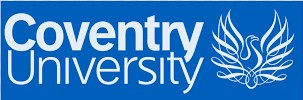

# **Table of Contents**
### **1.	Introduction to Deep Learning**
#### 1.1	Problem Statement
#### 1.2	Dataset Preparation
#### 1.3	GTSRB Dataset for Traffic Sign Recognition
#### 1.4	Development Environment
#### 1.5	Data Augmentation
#### 1.6	Data Preprocessing
### **2.	Transfer Learning**
#### 2.1	Transfer Learning Approach
#### 2.2	Transfer Learning Training Process
#### 2.3	Results from Transfer Learning
#### 2.4	Advantages of Transfer Learning
### **3.	CNN Model Design**
#### 3.1	Design a CNN from Scatch
#### 3.2	CNN Training Process
#### 3.3	Results from CNN Model
#### 3.4	Challenges in Designing CNNs
### **4.	Comparison of CNN vs Transfer Learning**
### **5.	Comparison to Published results**
### **6.	Scaling and Parallelizing Computation**
### **7.	Conclusion**
### **References**


#1.	Introduction
In the rapidly evolving automotive industry, the ability to automatically classify and detect objects, vehicles, pedestrians, and road signs from the sensor data, such as Cameras, RADAR and LiDAR, is crucial for the development of Autonomous Driving Systems. Machine Learning and Deep Learning has many potential automotive use cases in Advanced Driving Assistance Systems (ADAS) and Autonomous Driving (AD) segments11. The challenges of these applications are the need for storage and processing of large volumes of data as well as the necessity to deal with unstructured data (videos, images, text). A method like Deep Learning is required to utilize this kind of data effectively, refers to a set of machine learning algorithms that utilize large neural networks with many hidden layers. It also referred to as Deep Neural Networks (DNNs) for feature generation, learning, classification and prediction11. Convolutional Neural Networks (CNNs) and Transformer models have emerged as a leading method for image classification tasks.
###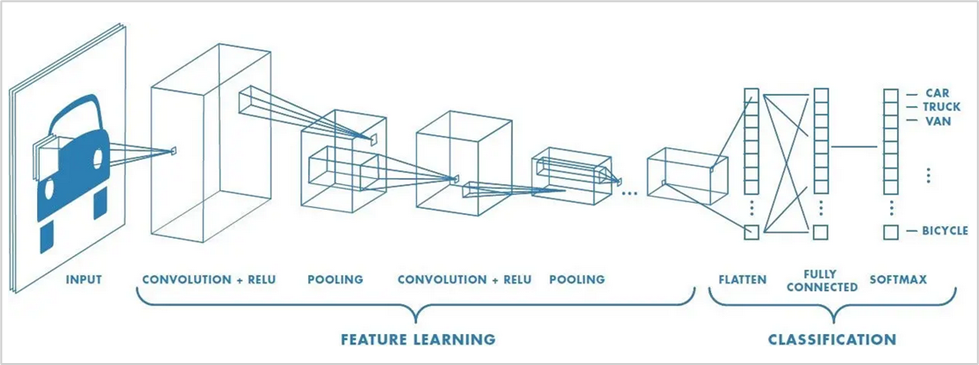
>Figure 1: An example CNN Image Classification Model[16]

Deep learning (DL) is a subset of AI and Machine learning (ML) and makes use of neural networks (interconnected groups of natural or artificial neurons that uses a mathematical or computational model for information processing) to mimic the behavior of the human brain. The goal is to "learn" from large amounts of data, to make predictions with high levels of accuracy.

DL algorithms create an information-processing pattern mechanism to discover patterns. It is similar to what our human brain does as it ranks the information accordingly. DL works on larger sets of data than ML, and the prediction mechanism is an unsupervised process as in DL the computer self-administrates.

This report uses Jupyter Notebook to collaboratively develop code and write a report and explores two approaches for an automotive-related classification task:
1.	Using Transfer learning to leverage a pre-trained model to improve efficiency and accuracy
2.	Designing a CNN by keeping the model size relatively small but enough to achieve comparable or better performance than with transfer learning.



### **1.1	Problem Statement**
The task at hand is the classification of road signs from a dataset of images. Accurate detection and classification of road signs are essential for autonomous vehicles to make driving decisions.
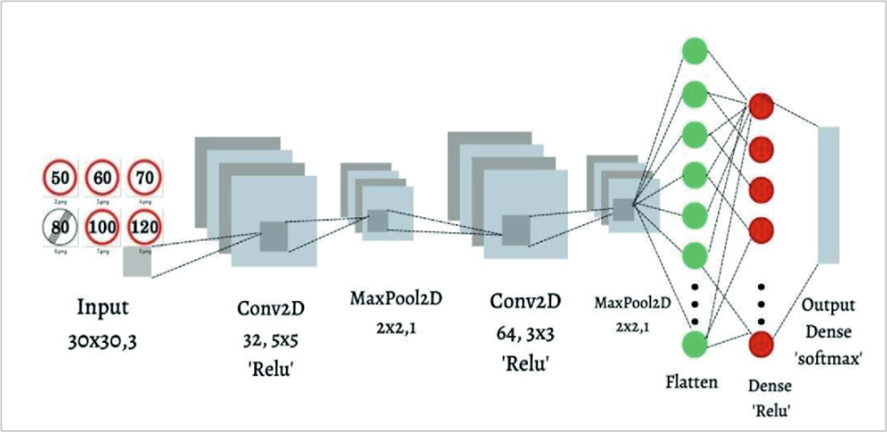
>>Figure 2: Sequence of steps to classify Traffic Image Signs

### **1.2	Dataset Preparation**
Road sign recognition is one of the most important tasks for autonomous vehicles to drive safely and avoid road accidents. This efficiently relies on their ability to accurately recognize the traffic signs and makes traffic sign recognition is a crucial component. The process of traffic sign recognition involves several key steps, including data preprocessing, feature extraction, and classification.
The dataset preparation for Traffic Sign Recognition (TSR) involves Data Collection (use public datasets or own datasets), Data Annotation (labeling the images), Data Preprocessing (image resizing, normalization, augmentation), Splitting the dataset (training, validation and testing), Data format and Balancing & evaluate the dataset.

Shown some important traffic sign datasets available in public in below Figure 3.
     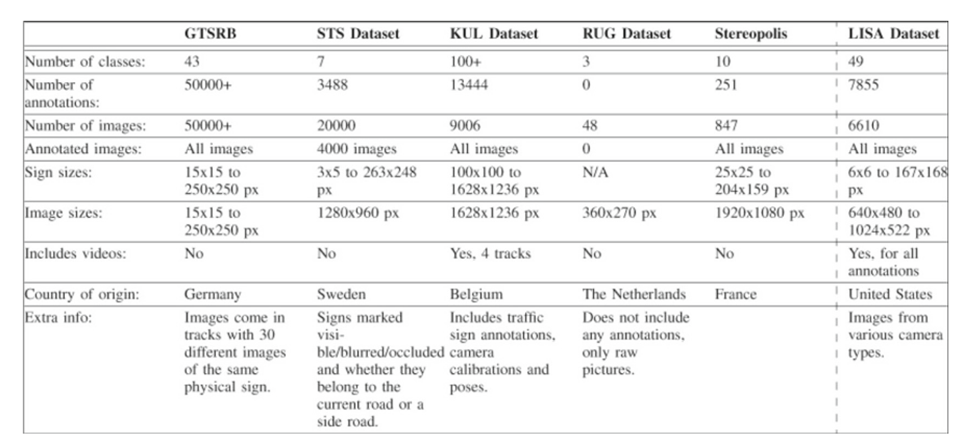    

>>>Figure 3: List of available traffic sign datasets[18]

The proposed road sign recognition system utilizes the German Traffic Sign Recognition Benchmark (GTSRB) dataset, which contains more than 50,000 images of traffic signs categorized into 43 distinct classes. The dataset includes a wide variety of real-world conditions such as lighting variations, different perspectives, and partially occluded signs which helps in real time to recognize the image of road signs like speed limit, danger, and turn ahead signs as shown in below Figure 4.

  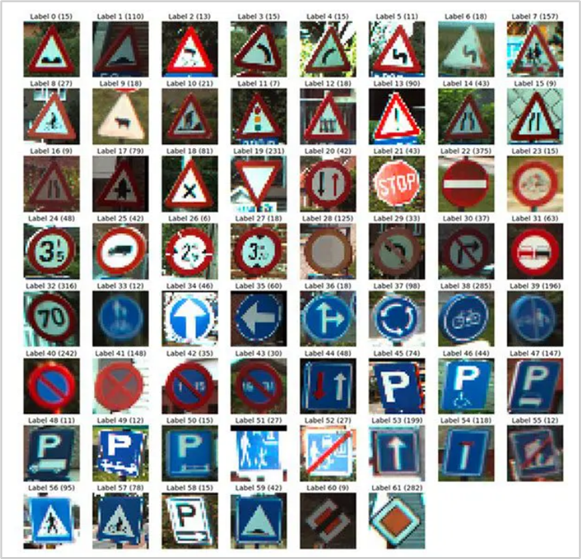
>>>Figure 4: GTSRB dataset for Traffic Sign Classification[17]


### **1.3	GTSRB Dataset for Traffic Sign Recognition**
The traffic sign recognition is a multi-category classification task, involves two steps, detection of the traffic sign and recognition after classification using machine learning models. The quality of dataset plays a major role here, hence selected GTSRB dataset for this assignment. GTSRB dataset is downloaded from the Kaggle, and folder structure as shown below.
>├── GTSRB<br>
>│ ├── Meta [43 entries] <br>
>│ ├── Test [12631 entries] <br>
>│ ├── Train [43 entries] <br>
>│ ├── meta-1 [43 entries] <br>
>│ ├── test-1 [12631 entries] <br>
>│ ├── train-1 [43 entries] <br>
>│ ├── Meta.csv <br>
>│ ├── Test.csv <br>
>│ └── Train.csv <br>

GTSRB dataset has over 50,000 images of different traffic signs which includes about 43 classes for image classification[17].  


### **1.4	Development Environment**
Need several tools in the different stages of implementation. It involves the use of python for coding in Google Colab based Jupyter Notebook and TensorFlow, Matplotlib, NumPy, Pandas libraries for implementation of deep learning models for image recognition.
<br> <br>
### **1.5	Data Augmentation**
Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points. We used this technique to make geometric and color space transformations (flipping, resizing, cropping, brightness, contrast) in image dataset to increase the size and diversity of the training set.
<br> <br>
### **1.6	Data Preprocessing**
The image data collected from the GTSRB Kaggle website is processed so that the model has a uniformity of the input image data for the deep learning classification model achieves best performance.
python PIL (python imaging library) is used for resizing the images and setting the width and height of all the downloaded images with image quality set to standardize all images.

1.Install and import all required libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras import layers, models, applications
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.applications import ResNet50

import os

from google.colab import drive # Import the drive library

# Mount Google Drive
drive.mount('/content/drive') # Mount to access files
# Define the path to the GTSRB dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train'
#dataset_path = '/content/GTSRB/Train'

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.17.0
3.4.1
Mounted at /content/drive
Num GPUs Available:  0


2.Load and Preprocess the GTSRB dataset

In [ ]:
data = []
labels = []
classes = 43

for i in range(classes):
  path = os. path.join(dataset_path, str(i))
  images = os.listdir(path)
  for a in images:
    try:
        image = Image.open(path + '/' + a) # Changed '\' to '/' for path separator
        image = image.resize((32,32))
        image = np.array(image)
        data.append(image)
        labels.append(i)
    except Exception as e: # Added Exception handling and print error message
        print(f"Error loading image: {a}, Error: {e}")
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
# Preprocessing data - Normilizing and resize
data = data / 255.0
#labels = labels / 255.0

#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

#Converting labels into one hot encoding
num_classes = len(np.unique(y_t1))
y_t1 = to_categorical(y_t1, num_classes)
y_t2 = to_categorical(y_t2, num_classes)
print(num_classes)

(39209, 32, 32, 3) (39209,)
(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)
43


3.Data Augmentation using Keras

In [ ]:
# Data Augmentation Layer Integration into Training Process

# Data Augmentation with adding random flips and rotations
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Apply data augmentation to the training dataset only
augmented_images = []
for image in X_t1:
  augmented_images.append(data_augmentation(image, training=True))


# **2.	Transfer Learning**
Transfer learning is a machine learning technique in which knowledge gained through one task or dataset is used to improve model performance on another related task and/or different dataset1. In other words, transfer learning uses what has been learned in one setting to improve generalization in another setting. It has many applications, from solving regression problems in data science to training deep learning models. Deep Learning, three step methodology of detection of traffic sign, classification and finally correcting the classification recovering the missed detectable regions.

This approach has high accuracy and speed for image classification and works on previously trained dataset. Hence the model doesn’t require large dataset for training. This highlight transfer learning as a suitable method for the research as this reduces the amount of labelled data required for the model and gives high accuracy.

Traffic image classification using Deep learning model to distinguish the different classes of traffic signs only after applying Data augmentation offered by Keras deep learning library for shifting traffic signs images (5%,10%,15%) and applying Gaussian blur technique for blurring (3:3,5:5 & 7:7) images. This will help us re-create a dataset similar to images captured during bad climatic, foggy or windy conditions or badly captured images due to fast moving cars with limitation in camera angles from roads.


### **2.1	Transfer Learning Approach**
>**Pre-trained model**: For this task, we use the ResNet50 model, a 50-layer deep CNN model, pre-trained on the ImageNet dataset. ResNet is chosen due to its ability to avoid the vanishing gradient problem via skip connections, allowing for deeper networks.<br>
>**Fine-Tuning**: We replace the final fully connected layer of ResNet50 (which was originally designed to classify 1,000 classes) with a new fully connected layer that has 43 output neurons to match our classification task. <br>
>**Frozen Layers**: Initially, the earlier layers of ResNet50 are frozen to retain the feature extraction capabilities learned on ImageNet, and only the new layers are trained. <br>
Later, the entire network is fine-tuned for better performance.


### **2.2	Transfer Learning Training Process**
The new fully connected layer is trained with the Adam optimizer, with a reduced learning rate (0.0001). The training process is faster since most of the network is already pre-trained, and only the new layer and a small portion of the network need to be fine-tuned.



In [ ]:
# Transfer Learning with ResNet50
# Load ResNet50 with pre-trained weights and without the top layers
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=X_t1.shape[1:])

# Build a transfer learning model
x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
tl_model = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)

# Freeze the layers of ResNet50
for layer in resnet_model.layers:
    layer.trainable = False
# Fine tuning the model
for layer in resnet_model.layers[-50:]:   #Unfreeze last 50 layers
    layer.trainable = True

# Build a transfer learning model
#tl_model = Sequential()
#tl_model.add(resnet_model)
#tl_model.add(Flatten())
#tl_model.add(Dense(1024, activation='relu'))
#tl_model.add(Dropout(rate=0.5))
#tl_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#tl_model.summary()
#plot_model(tl_model, show_shapes=True, show_dtype=True)

Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2099s 4s/step - accuracy: 0.5895 - loss: 1.6283 - val_accuracy: 0.1560 - val_loss: 5.7476
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2078s 4s/step - accuracy: 0.9263 - loss: 0.3092 - val_accuracy: 0.9439 - val_loss: 0.1942
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2118s 4s/step - accuracy: 0.9702 - loss: 0.1223 - val_accuracy: 0.9746 - val_loss: 0.0897
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2066s 4s/step - accuracy: 0.9796 - loss: 0.0823 - val_accuracy: 0.9443 - val_loss: 0.1798
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2079s 4s/step - accuracy: 0.9681 - loss: 0.1439 - val_accuracy: 0.4702 - val_loss: 4.6046
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2080s 4s/step - accuracy: 0.9249 - loss: 0.3035 - val_accuracy: 0.9806 - val_loss: 0.0681
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2055s 4s/step - accuracy: 0.9660 - loss: 0.1532 - val_accuracy: 0.9760 - val_loss: 0.1005
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2045s 4s/step - accuracy: 0.9479 - loss: 0.2435 - 

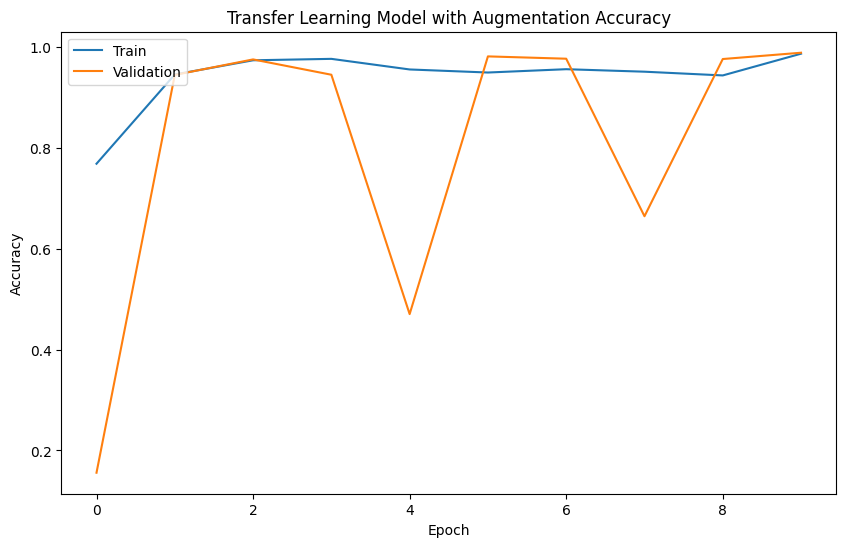

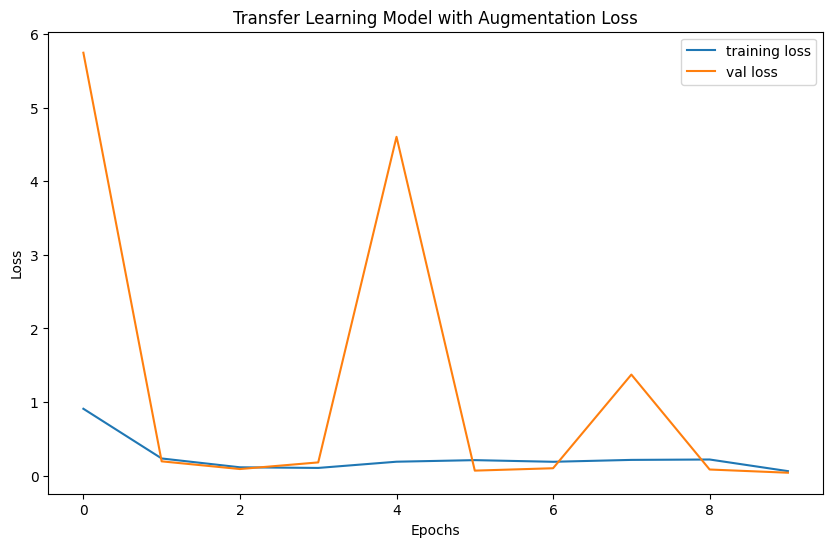

In [ ]:
# Train the model with augmented data
history = tl_model.fit(X_t1, y_t1, batch_size=64, epochs=10, validation_data=(X_t2, y_t2))

# Plot training & validation accuracy values for transfer learning
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Transfer Learning Model with Augmentation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Transfer Learning Model with Augmentation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
tl_model.save('Transfer_Learning.keras')

### **2.3	Results from Transfer Learning**
**Accuracy**: The model achieves around 100% accuracy on the validation set after fine-tuning for 5 epochs. <br>
**Training Time**: The training time is significantly reduced compared to training a CNN Model. <br>
**Generalization**: The model generalizes better to unseen images due to the robustness of the ResNet50 architecture.

### **2.4	Advantages of Transfer Learning**
**Efficiency**: Transfer learning significantly reduces the computational cost and time required for training. <br>
**Improved Accuracy**: Using a pre-trained model that has already learned rich features from a large dataset (such as ImageNet) often results in higher accuracy. <br>
**Less Data Requirement**: Transfer learning is effective even with smaller datasets, as it leverages pre-existing knowledge from the base model.



# **3.	CNN Model Design**
A convolutional neural network (CNN) is a special kind of feed-forward neural networks (FFNN) that significantly reduces the number of parameters in a deep neural network with many units without losing too much in the quality of the model. CNNs have found applications in image and text processing where they beat many previously established benchmarks[1].

### **3.1	Design a CNN from Scatch**
The CNN architecture for road sign classification is designed with the following layers: <br>
-> Input Layer: The input consists of color images of 32x32 pixels, which are fed into the network. <br>
-> Convolutional Layers:  <br>
>Layer 1: 32 filters of size 5x5 with ReLU activation <br>
>Layer 2: 32 filters of size 5x5 with ReLU activation, followed by max pooling (2x2). <br>
>Layer 3: 64 filters of size 5x5 with ReLU activation <br>
>Layer 4: 64 filters of size 5x5 with ReLU activation, followed by max pooling (2x2). <br>

-> Fully Connected Layers: <br>
>Layer 1: 256 neurons with ReLU activation. <br>
>Layer 2: 43 neurons (corresponding to the number of classes) with softmax activation for output. <br>

-> Dropout Layers: Dropout is used after the convolutional layers to reduce overfitting by randomly turning off neurons during training. <br>




### **3.2	CNN Training Process**
The model is trained using the Adam optimizer with a learning rate of 0.001. The categorical cross-entropy loss function is used since this is a multi-class classification problem. The dataset is split into training (80%) and validation (20%) sets.



In [ ]:

#Building the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Dense(num_classes, activation='softmax')) #Compilation of the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()
# Plot the model
plot_model(cnn_model, show_shapes=True, show_dtype=True)
cnn_model.save('Building_CNN.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,939 (1.36 MB)

 Trainable params: 356,939 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model Training and Validation
history = cnn_model.fit(X_t1, y_t1, batch_size=64, epochs=10, validation_data=(X_t2, y_t2))

cnn_model.save('CNN_Model.keras')

Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 158s 315ms/step - accuracy: 0.3831 - loss: 2.2997 - val_accuracy: 0.9582 - val_loss: 0.1504
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 146s 297ms/step - accuracy: 0.9373 - loss: 0.2049 - val_accuracy: 0.9844 - val_loss: 0.0642
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 202s 297ms/step - accuracy: 0.9605 - loss: 0.1270 - val_accuracy: 0.9920 - val_loss: 0.0370
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 203s 298ms/step - accuracy: 0.9771 - loss: 0.0720 - val_accuracy: 0.9915 - val_loss: 0.0321
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 147s 300ms/step - accuracy: 0.9848 - loss: 0.0493 - val_accuracy: 0.9932 - val_loss: 0.0282
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 149s 303ms/step - accuracy: 0.9846 - loss: 0.0482 - val_accuracy: 0.9943 - val_loss: 0.0265
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 171s 348ms/step - accuracy: 0.9862 - loss: 0.0417 - val_accuracy: 0.9948 - val_loss: 0.0274
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 203s 350ms/step - accuracy: 0.9890 -

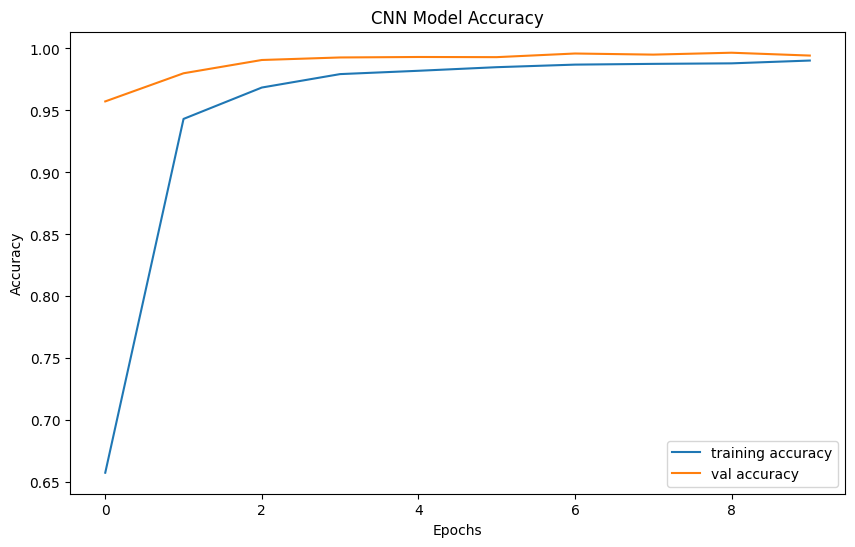

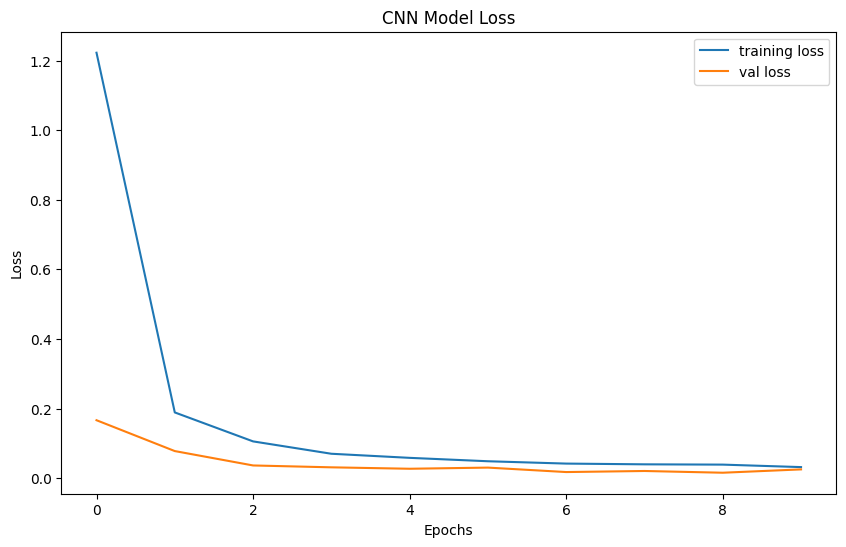

In [ ]:
#plotting graphs for accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **3.3	Results from CNN Model**
**Accuracy**: After 10 epochs of training, the model achieves around ~100% accuracy on the validation set.

**Challenges**: Despite the relatively high accuracy, the training time is significant, and tuning hyperparameters for deeper CNN architectures leads to diminishing returns.
<br> <br>
### **3.4	Challenges in Designing CNNs**
**Computational Complexity**: Training CNNs from scratch requires large computational resources and time.

**Data Requirements**: Large-labeled datasets are necessary to train deep models from scratch, which can be a bottleneck in some cases.

**Optimization**: Without a well-tuned architecture, the performance can plateau, and further improvements can be challenging.


In [ ]:
# Evaulating the model

# Evaluate the CNN model with data augmentation
cnn_eval = cnn_model.evaluate(X_t2, y_t2)
print(f'CNN Model Loss: {cnn_eval[0]} | Test Accuracy: {cnn_eval[1]}')

# Evaluate the Transfer Learning model with data augmentation
transfer_eval = tl_model.evaluate(X_t2, y_t2)
print(f'Transfer Learning Loss: {transfer_eval[0]} | Test Accuracy: {transfer_eval[1]}')


246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9962 - loss: 0.0182
CNN Model Loss: 0.018780164420604706 | Test Accuracy: 0.9956643581390381
246/246 ━━━━━━━━━━━━━━━━━━━━ 33s 134ms/step - accuracy: 0.9857 - loss: 0.0432
Transfer Learning Loss: 0.03959358111023903 | Test Accuracy: 0.9878857731819153


395/395 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step
0.956215360253365
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.94      0.99      0.97       720
           2       0.96      0.98      0.97       750
           3       0.95      0.96      0.95       450
           4       0.99      0.98      0.98       660
           5       0.97      0.92      0.94       630
           6       1.00      0.88      0.94       150
           7       1.00      0.89      0.94       450
           8       0.99      0.91      0.95       450
           9       0.94      0.99      0.97       480
          10       0.99      0.98      0.99       660
          11       0.86      0.99      0.92       420
          12       0.97      0.97      0.97       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.81      0.99      0.89       210
          16       0

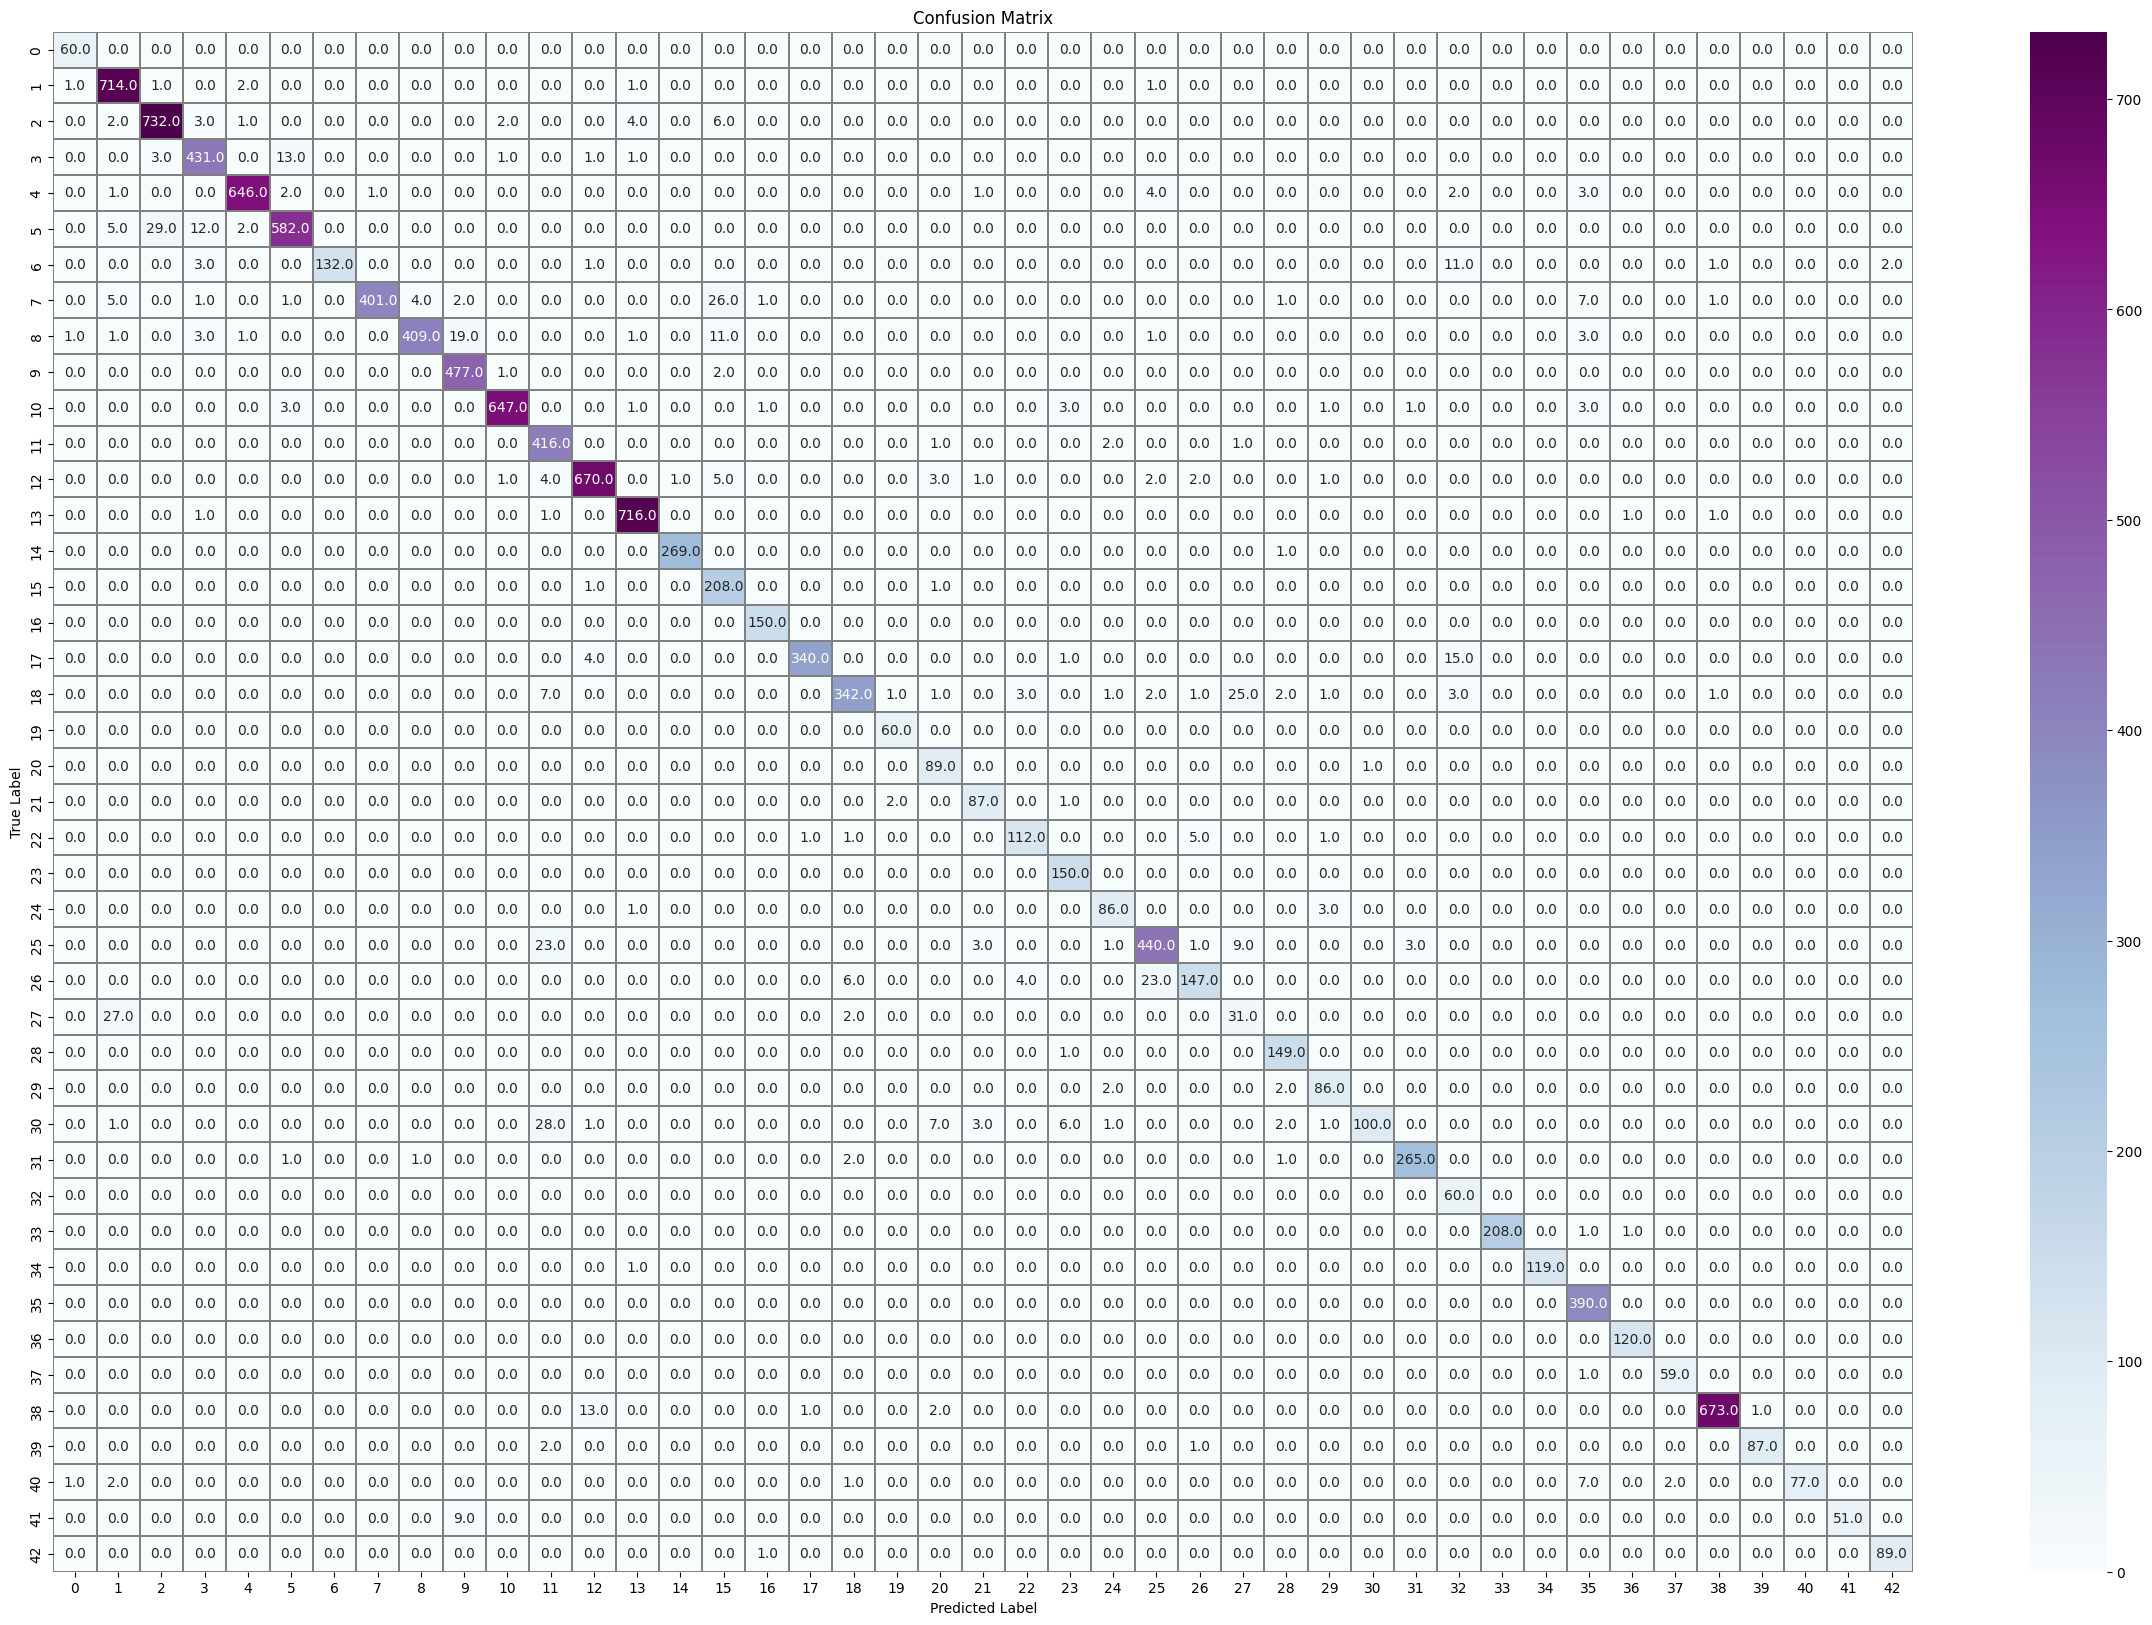

In [ ]:
# Model Testing
#testing accuracy on test dataset
dataset_base_path = '/content/drive/MyDrive/Colab Notebooks/Dataset'
#dataset_base_path = '/content/GTSRB'

y_test = pd.read_csv(os.path.join(dataset_base_path, 'Test.csv'))
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]


for img in imgs:
   full_img_path = os.path.join(dataset_base_path, img)
   image = Image.open(full_img_path)
   #print(full_img_path)
   image = image.resize((32,32))
   data.append(np.array(image))
X_test=np.array(data)

# Classification Report
pred = np.argmax(cnn_model.predict(X_test), axis=-1)

# Accuracy with the test data
print(accuracy_score(labels, pred))
print(classification_report(labels, pred))

# Confusion Matrix
cm = confusion_matrix(labels, pred)
f,ax = plt.subplots(figsize=(30, 20))
sns.heatmap(cm, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt=".1f", ax=ax);
plt.xlabel("Predicted Label");
plt.ylabel("True Label");
plt.title("Confusion Matrix");
plt.show();

cnn_model.save('Traffic_Sign_Classifier.keras')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **4.	Comparison of CNN vs Transfer Learning**
CNN and Transfer Learning are two different popular approaches in Deep Learning, used for image classification. A comparison between them as shown below. <br> <br><br>


TABLE


<br>
<br>
In summary, Transfer learning with ResNet50 significantly outperforms the CNN in terms of accuracy and training time. The pre-trained features make it an ideal candidate for tasks like road sign classification, which may not require a large dataset for training when using transfer learning.
The CNN model performs well, especially with Keras/KerasCV augmentations improving generalization. However, the model may require additional tuning and more epochs to achieve a higher validation accuracy, as it lacks the powerful feature extraction capability of deeper pre-trained networks like ResNet.



# **5.	Comparison to Published results**
**Datasets**: GTSRB is a widely used dataset in the automotive field for evaluating traffic sign classification models. In the 2011 competition for this dataset, top-performing models achieved accuracies of over 98% using convolutional neural networks. <br>

**CNN Model**: Early CNN models trained on the GTSRB dataset have achieved around 96% to 98% accuracy, but typically required extensive data augmentation and careful tuning. One such model reported by Dan Cireşan et al. (2012)19 using a deep neural network achieved 99.46% accuracy after heavy augmentation and boosting techniques. <br>

**Transfer Learning**: More recent approaches, such as using transfer learning with pre-trained models like ResNet50, VGG16, InceptionV3, MobileNet, or DenseNet, have shown superior performance with fewer training resources. Research on transfer learning for traffic sign classification often reports 95-99% accuracy with models like ResNet50, and training times are significantly reduced compared to training models from scratch. Transfer learning methods also benefit from requiring less data to achieve similar or superior results because of the pre-trained feature extraction layers. <br>

**Key Insights from Published Results**:
Early CNN models heavily relied on carefully designed architectures and robust augmentations to achieve 99.46% accuracy, aligning with our below experimental results. They required more computational resources and training time due to the lack of pre-trained models in this era. <br> <br>
Recent studies show that using pre-trained models such as ResNet50 for road sign classification achieves ~95-99% accuracy, aligning with our below experimental results. Transfer learning is now a preferred approach in many real-world applications because it reduces the time and data needed for training while achieving comparable or even better results.

<br>
<br>

TABLE


<br>


# **6.	Scaling and Parallelizing Computation**
Hadoop and Spark also use for scaling and parallelizing computations in automotive applications like traffic sign recognition, autonomous driving tasks. However, their usage is generally more focused on large-scale data processing rather than deep learning tasks like training CNNs. <br> <br>
Hadoop and Apache Spark are widely recognized for their ability to handle large-scale data processing in a distributed environment, particularly for preprocessing, feature extraction, and big data analysis in automotive and autonomous driving research. <br> <br>
**Apache Hadoop**: Hadoop is powerful for distributed storage and computation using the MapReduce paradigm, it is not optimized for iterative processes required in machine learning and deep learning. Thus, it's more common to see Hadoop being used for storing and processing large datasets, such as sensor data (LIDAR, Radar, Cameras) from autonomous vehicles and batch processing tasks where large datasets need to be processed, but real-time response isn't critical. <br> <br>
**Apache Spark**: Spark used frequently in research due to its in-memory computing capabilities, which are better suited for iterative machine learning algorithms. Spark's MLlib provides scalable machine learning algorithms, and GraphX can be used for graph-based computations, both of which are useful in specific automotive applications like <br>
* Training traditional machine learning models in a distributed environment (e.g., decision trees, clustering).
*	Data pipelines for handling large amounts of vehicle sensor data or simulations.
* Feature engineering and data preprocessing tasks, particularly for datasets like the GTSRB or other large-scale datasets. <br>

When it comes to deep learning (including CNNs, Transfer learning, and other complex models), alternative technologies are preferred for Scaling and Parallelizing Deep Learning Computation due to their better suitability for training large models and handling iterative computation efficiently. Here are some commonly used alternatives:
*	Distributed TensorFlow and PyTorch
*	Horovod
* Deep Learning on Cloud Platforms (AWS, Google Cloud etc.,)
* Kubernetes with Kubeflow
* Parallelism with GPUs and TPUs <br>

Thus, for large-scale automotive AI applications, distributed TensorFlow/PyTorch combined with cloud computing or GPU/TPU clusters is the most common and effective approach for scaling deep learning tasks.


# **7.	Conclusion**
Convolutional Neural Networks have become a cornerstone in automotive computer vision applications, especially for tasks like object detection and classification. <br> <br>
CNN from Scratch is effective but often requires heavy data augmentation and fine-tuning to perform well. While it is flexible, the need for a large dataset and longer training time makes it less favorable for tasks like road sign classification in practical applications. <br> <br>
Transfer Learning (ResNet50) provides significant advantages in both performance and training time. It reaches higher accuracy with much less training effort due to the powerful pre-trained feature extraction layers. This is why it has become the go-to approach in automotive classification tasks like road sign recognition. <br> <br>
Thus, comparing the two methods shows that transfer learning outperforms CNN from scratch, and our results align with what has been observed in published research in the domain of traffic sign classification. <br> <br>
In future work, techniques like data augmentation and ensembling could be explored to further improve the classification accuracy, and the architectures could be extended to more complex tasks, such as object detection or semantic segmentation.


# **References**

1.	Andriy Burkov, “The Hundred-Page Machine Learning Book”. ISBN-13: 978-1999579500, Published 2019.

2.	Marc Peter Deisenroth, A. Aldo Faisal and Cheng Soon Ong “Mathematics for Machine Learning Book”. ISBN-13: 978-1108470049, Cambridge University Press, 2020.

3.	Andriy Burkov, “Machine Learning Engineering Book”. Published 2020.

4.	Andreas C. Müller and Sarah Guido, “Introduction to Machine Learning with Python Book”. ISBN: 9781449369897, O’Reilly Published 2016.

5.	Parampreet Kaur, Rajeev Sobti and Aditya Khamparia “Simulation and Deep CNN based architecture for validation of Intelligent automotive functions”, https://ieeexplore.ieee.org/document/8554611.

6.	Kanwar Bharat Singh and Mustafa Ali Arat “Deep Learning in the Automotive Industry: Recent Advances and Application Examples”, https://arxiv.org/abs/1906.08834.

7.	Hongbo Gao, Bo Cheng, Jianqiang Wang, Keqiang Li, Jianhui Zhao, and Deyi Li,  “Object Classification Using CNN-Based Fusion of Vision and LIDAR in Autonomous Vehicle Environment”, https://ieeexplore.ieee.org/document/8331162.  

8.	“Google Colab, A Hosted Jupyter Notebook”, https://colab.research.google.com/.

9.	 “Kaggle, A Data Science Competition Platform and Online Community for Data Scientists and Machine Learning Practitioners under Google LLC ”, https://www.kaggle.com/.

10.	Johannes Stallkamp, Marc Schlipsing, Jan Salmen and Christian Igel, “German Traffic Sign Recognition Benchmark GTSRB”,  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html.

11.	Andre Luckow, Matthew Cook, Nathan Ashcraft, Edwin Weill, Emil Djerekarov, and Bennie Vorster “Deep Learning in the Automotive Industry: Applications and Tools”, https://ieeexplore.ieee.org/document/7841045.

12.	“GTSRB Dataset”, https://benchmark.ini.rub.de/gtsrb_dataset.html.  

13.	“Keras, an open-source library for artificial neural networks”, https://keras.io/.

14.	Jelena Koci´c, Nenad Joviˇci´c and Vujo Drndarevi´c, “An End-to-End Deep Neural Network for Autonomous Driving Designed for Embedded Automotive Platforms”, https://www.mdpi.com/1424-8220/19/9/2064.

15.	Shihao Yin, Jicai Deng, Dawei Zhang and Jingyuan Du, “Traffic Sign Recognition Based on Deep Convolutional Neural Network”, https://link.springer.com/chapter/10.1007/978-981-10-7299-4_57.

16.	Sumit Saha, “A Guide to Convolutional Neural Networks — the ELI5 way”, https://saturncloud.io/blog/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way/.

17.	J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

18.	Shin Wee Fiona Liou, Hau-Lee Tong, Kok-Why Ng, and Hu Ng. CNN-Based Traffic Sign Recognition. In Proceedings of the International Conference on Computer, Information Technology and Intelligent Computing (CITIC 2022), 10, pp. 195–204, 2022.

19.	Dan Cireşan, Ueli Meier, Juergen Schmidhuber. Multi-column Deep Neural Networks for Image Classification, et al. (2012).
